# Project: Investigate the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We will tentatively answer the following questions:
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset looks clean. The only cleaning steps needed are:

- Drop unnecessary columns.
- Drop duplicates if any.
- Drop some rows containing missing values.

### Drop unnecessary columns

In [4]:
df.drop(columns=['id','imdb_id','homepage','budget','revenue'],inplace=True)

### Drop duplicates if any

In [5]:
df.duplicated().sum()

1

There's indeed one duplicate.

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

### Drop rows containing missing values. 

In [7]:
df.dropna(subset = ['genres'], inplace=True)

In [8]:
df.shape

(10842, 16)

<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular?

In [9]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

We can see that each movie can be categorized into several genres, and we need to find what these genres are.

In [10]:
genres_combined = df['genres'].unique()
genres_set = set()
for genres in genres_combined:
#     print(genres.split(sep='|'))
    list = genres.split(sep='|')
    for g in list:
        genres_set.add(g)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

**One-hot encoding of genres**

We then add a few columns, whose names are the genres above, and in which 1 or 0 will denote whether the movie is fit into that genre.

In [11]:
genres_list = [l for l in genres_set]
genres_list

['Foreign',
 'Western',
 'Family',
 'War',
 'History',
 'Thriller',
 'Horror',
 'Music',
 'Action',
 'Drama',
 'Mystery',
 'Documentary',
 'Comedy',
 'Science Fiction',
 'Crime',
 'Adventure',
 'Animation',
 'Fantasy',
 'Romance',
 'TV Movie']

In [12]:
for genre in genres_list:
    df[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [13]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'Foreign', 'Western', 'Family', 'War',
       'History', 'Thriller', 'Horror', 'Music', 'Action', 'Drama', 'Mystery',
       'Documentary', 'Comedy', 'Science Fiction', 'Crime', 'Adventure',
       'Animation', 'Fantasy', 'Romance', 'TV Movie'],
      dtype='object')

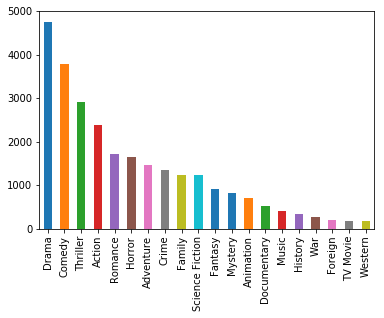

In [14]:
genres_counts = df.iloc[:,-20:].sum().sort_values(ascending = False)
genres_counts.plot.bar()

The plot above clearly shows that drama, comedy, thriller and action movies are the biggest proportions of movies.

### Which genres are most popular from year to year?

In [15]:
df.groupby('release_year').size();

In [16]:
df_year = df.groupby('release_year').sum().iloc[:,-20:]

In [17]:
df_year['sum'] = df_year.sum(axis=1)

In [18]:
# print(df2.head())
df_year_prop = df_year.div(df_year['sum'], axis=0)
df_year_prop.head()


,Foreign,Western,Family,War,History,Thriller,Horror,Music,Action,Drama,...,Documentary,Comedy,Science Fiction,Crime,Adventure,Animation,Fantasy,Romance,TV Movie,sum
release_year,,,,,,,,,,,,,,,,,,,,,
1960,0.012821,0.076923,0.038462,0.025641,0.064103,0.076923,0.089744,0.012821,0.102564,0.166667,...,0.0,0.102564,0.038462,0.025641,0.064103,0.000000,0.025641,0.076923,0.0,1.0
1961,0.013333,0.040000,0.066667,0.026667,0.040000,0.000000,0.040000,0.026667,0.093333,0.213333,...,0.0,0.133333,0.053333,0.026667,0.080000,0.013333,0.026667,0.093333,0.0,1.0
1962,0.012195,0.036585,0.024390,0.036585,0.048780,0.085366,0.060976,0.012195,0.097561,0.256098,...,0.0,0.060976,0.024390,0.036585,0.085366,0.000000,0.012195,0.060976,0.0,1.0
1963,0.021978,0.021978,0.032967,0.010989,0.043956,0.109890,0.098901,0.000000,0.043956,0.142857,...,0.0,0.142857,0.021978,0.043956,0.076923,0.010989,0.021978,0.087912,0.0,1.0
1964,0.009009,0.009009,0.036036,0.027027,0.027027,0.081081,0.054054,0.045045,0.045045,0.180180,...,0.0,0.144144,0.036036,0.090090,0.045045,0.018018,0.036036,0.081081,0.0,1.0


In [19]:
df_year_prop.iloc[:,:-1].idxmax(axis=1)

release_year
1960     Drama
1961     Drama
1962     Drama
1963     Drama
1964     Drama
1965     Drama
1966     Drama
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

The statistics above shows that from year to year drama and comedy movies are the most popular, especially drama movies. How these genres are distributed from year to year are visulized below.

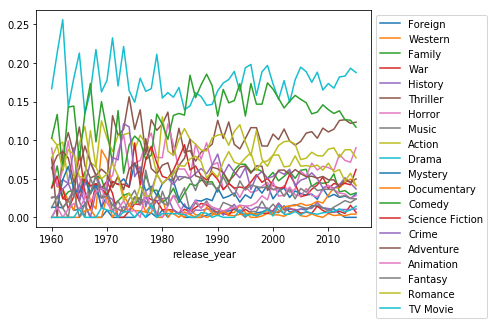

In [20]:
ax = df_year_prop.reset_index().plot(x='release_year', y = genres_list,  kind='line')
ax.legend(loc = 'best',bbox_to_anchor=(1.0, 1.0))

We can calculate moving averages to make the curves smoother.

In [21]:
df_ma = df_year_prop.copy(deep=True)
for genres in genres_list:
    df_ma[genres] = df_year_prop[genres].rolling(10).mean()

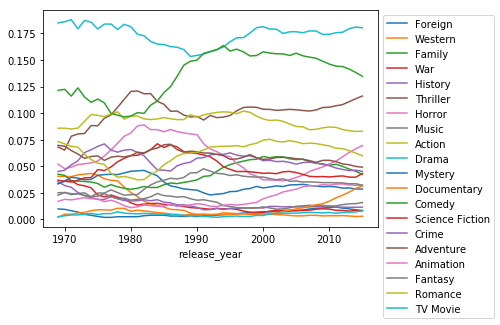

In [22]:
ax = df_ma.reset_index().plot(x='release_year', y = genres_list,  kind='line')
ax.legend(loc = 'best',bbox_to_anchor=(1.0, 1.0))

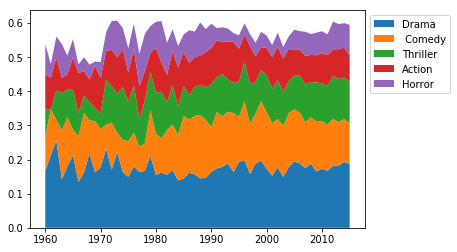

In [23]:
df_year_prop = df_year_prop.reset_index()
plt.stackplot(df_year_prop['release_year'],df_year_prop['Drama'],df_year_prop['Comedy'], df_year_prop['Thriller'], df_year_prop['Action'], df_year_prop['Horror'], labels = ['Drama',' Comedy','Thriller','Action','Horror'])
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1.0))

### What kinds of properties are associated with movies that have high revenues?

Let's focus on numerical features below.

In [24]:
df_num = df[['popularity','runtime','vote_count', 'vote_average','budget_adj', 'revenue_adj']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f997550>,
      dtype=object)

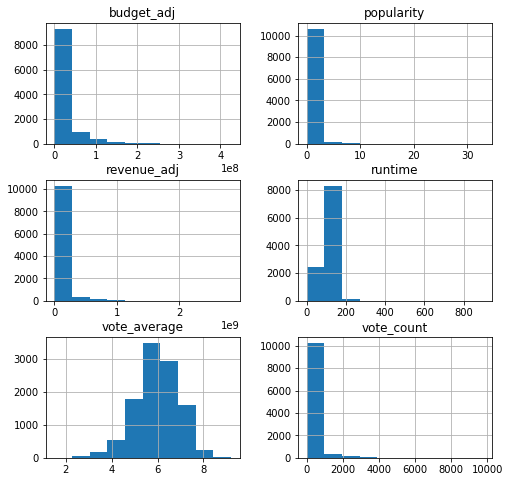

In [25]:
df_num.hist(figsize=(8,8))

In [26]:
df_num.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,102.138443,217.823649,5.974064,1.758712e+07,5.147797e+07
std,1.001032,31.294612,576.180993,0.934257,3.433437e+07,1.447723e+08
min,0.000065,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.208210,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.384532,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.715393,111.000000,146.000000,6.600000,2.092507e+07,3.387838e+07
max,32.985763,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


The table above shows that there are lots of movies whose runtime, budget_adj and revenue_adj are 0.0, which is an indicator of missing value. Let's drop these rows.

In [27]:
df_num.query('runtime != 0 & budget_adj!=0 & revenue_adj!=0', inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_num.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,4.423999e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,4.480925e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,3.001611e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09


Then let's normalize these numerical values.

In [29]:
df_normalized = (df_num-df_num.mean())/df_num.std()
df_normalized.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03
mean,-1.323107e-16,1.168845e-16,-1.166397e-16,-1.745274e-15,-3.515783e-15,4.012676e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.069873e-01,-4.729265e+00,-5.883474e-01,-4.991901e+00,-9.872959e-01,-6.342318e-01
25%,-4.943095e-01,-7.137690e-01,-5.190258e-01,-5.889433e-01,-6.951570e-01,-5.492879e-01
50%,-2.671188e-01,-1.616383e-01,-3.678820e-01,4.005063e-02,-3.174318e-01,-3.485889e-01
75%,1.198308e-01,4.908798e-01,5.941168e-02,6.690446e-01,3.653950e-01,1.212012e-01
max,2.155303e+01,1.148330e+01,1.049970e+01,2.807624e+00,8.497352e+00,1.244756e+01


Let's plot the pairwise correlations.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


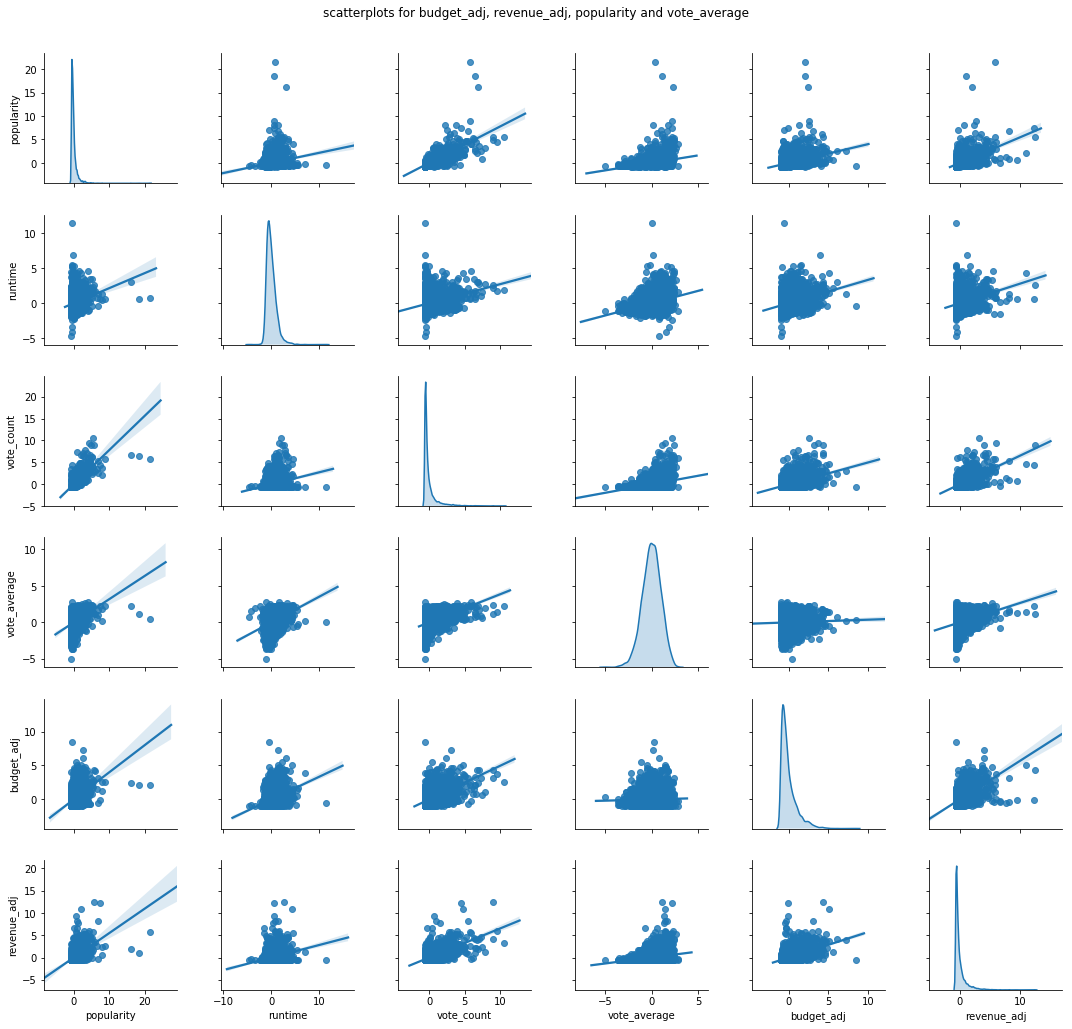

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
f1 = sns.pairplot(df_normalized, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('scatterplots for budget_adj, revenue_adj, popularity and vote_average\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [31]:
df_normalized.corr()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
popularity,1.000000,0.215092,0.780096,0.317866,0.399356,0.546959
runtime,0.215092,1.000000,0.273771,0.351712,0.333976,0.280505
vote_count,0.780096,0.273771,1.000000,0.387210,0.497970,0.654688
vote_average,0.317866,0.351712,0.387210,1.000000,0.036803,0.266844
budget_adj,0.399356,0.333976,0.497970,0.036803,1.000000,0.570451
revenue_adj,0.546959,0.280505,0.654688,0.266844,0.570451,1.000000


- It can be seen that all the these features are at least moderately positive correlated with the revenue. The most significant correlations are from vote_count, budget and popularity.
- Vote_account and popularity are highly correlated, which intuitively makes sense.
- For vote_average, which is another indicator of how successful a movie is, are not very strongly correlated with other features. It's especially interesting to see that vote_average is not quite correlated with the budget.


In the following, I will divide each feature into four groups and see the mean revenue of each group in order to get a more intuitive understanding of how they are correlated. First of all I'll define a function that divide the movies.

In [32]:
df_normalized.describe()

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03,3.854000e+03
mean,-1.323107e-16,1.168845e-16,-1.166397e-16,-1.745274e-15,-3.515783e-15,4.012676e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.069873e-01,-4.729265e+00,-5.883474e-01,-4.991901e+00,-9.872959e-01,-6.342318e-01
25%,-4.943095e-01,-7.137690e-01,-5.190258e-01,-5.889433e-01,-6.951570e-01,-5.492879e-01
50%,-2.671188e-01,-1.616383e-01,-3.678820e-01,4.005063e-02,-3.174318e-01,-3.485889e-01
75%,1.198308e-01,4.908798e-01,5.941168e-02,6.690446e-01,3.653950e-01,1.212012e-01
max,2.155303e+01,1.148330e+01,1.049970e+01,2.807624e+00,8.497352e+00,1.244756e+01


In [33]:
def divide(column, focus='revenue_adj', df = df_normalized):
    desc = df[column].describe()
    bin_edges = [desc[i] for i in range(3,8)]
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
    df[column+'_levels'] = pd.cut(df[column], bin_edges, labels=bin_names, include_lowest = True)
    # Create a bar chart with proper labels
    o = df.groupby([column+'_levels'])[focus].mean()
    o.plot(kind='bar')
    plt.show()

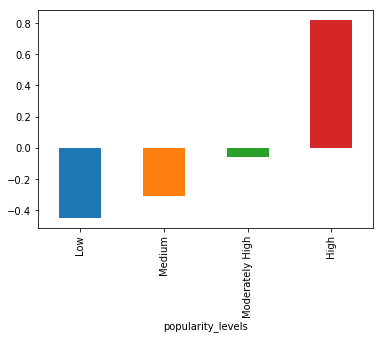

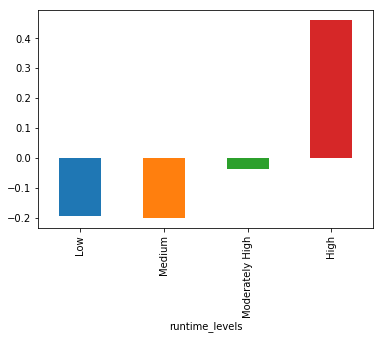

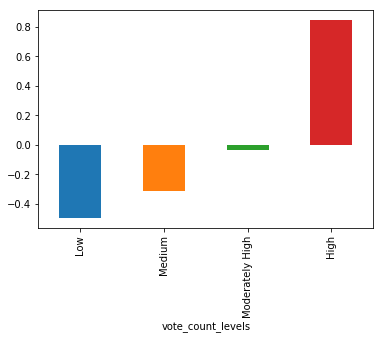

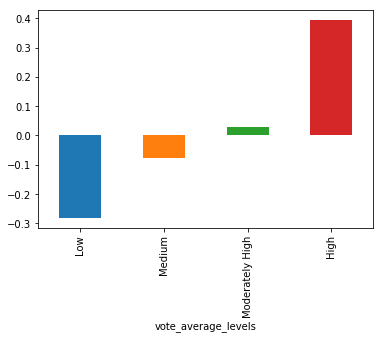

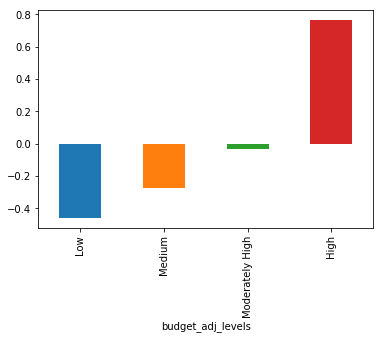

In [34]:
for col in ['popularity','runtime','vote_count','vote_average','budget_adj']:
    divide(col)

The plots above reflect the conclusions we obtained above using linear regression. The plot below also shows that vote_average and budget are weakly correlated. Movies with low budgets even get slightly better votes on average. 

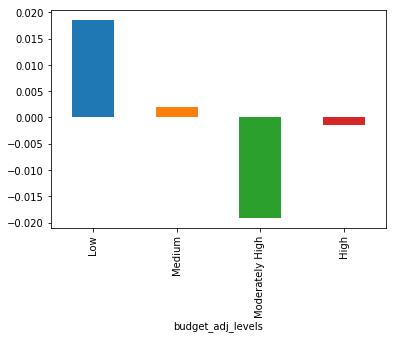

In [35]:
divide('budget_adj', focus='vote_average', df = df_normalized)

<a id='conclusions'></a>
## Conclusions

- Drama, comedy, thriller and action movies are the biggest proportions of movies.
- From year to year drama and comedy movies are the most popular, especially drama movies.
- Popularity, average votes, number of votes and budgets are at least moderately positive correlated with the revenue. The most significant correlations are from number of votes, budget and popularity.
- Vote_account and popularity are highly correlated, which intuitively makes sense.
- For average vote, another indicator of how successful a movie is, are not very strongly correlated with other features. It's especially interesting to see that the average vote is only weakly correlated with the budget.